# Lab 1.5: Neural Network Visualization

## Duration: 45 minutes

## Learning Objectives
By the end of this lab, you will be able to:
- Visualize neural network architectures and data flow
- Create interactive visualizations of network behavior
- Understand how multiple layers transform data representations
- Analyze feature learning through visualization
- Build intuition about deep learning through visual exploration

## Prerequisites
- Completed Lab 1.1 (Environment Setup)
- Completed Lab 1.2 (Mathematical Foundations)
- Completed Lab 1.3 (Activation Functions)
- Completed Lab 1.4 (Basic Neuron Implementation)
- Understanding of neural network components

---

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]

print("Environment ready for neural network visualization!")

Environment ready for neural network visualization!


## Part 1: Network Architecture Visualization

Let's start by creating clear visualizations of neural network architectures.

PART 1: NEURAL NETWORK ARCHITECTURE DIAGRAMS

Example 1: Simple Classification Network


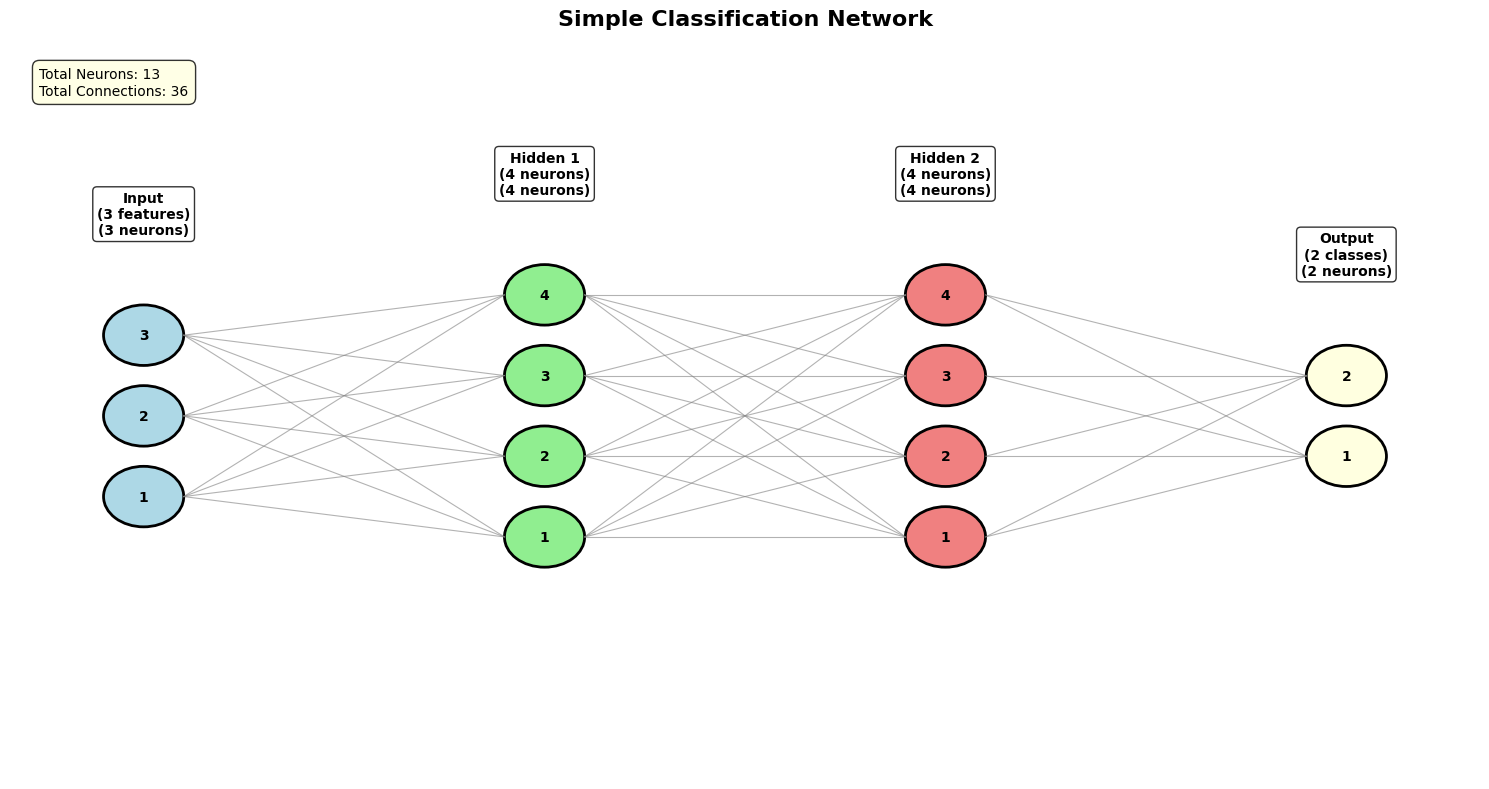


Example 2: Deep Network for Image Recognition


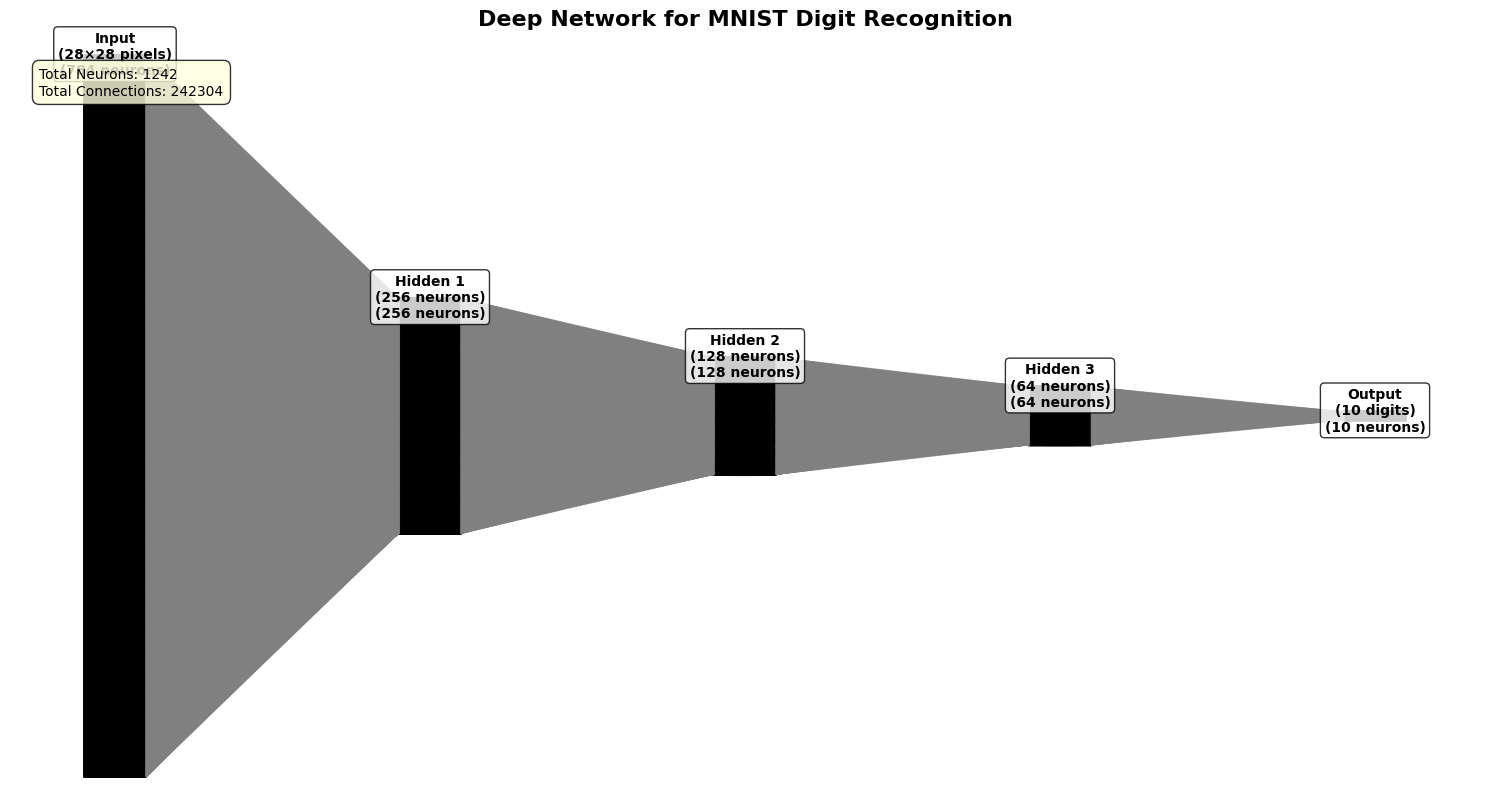

In [9]:
print("=" * 45)
print("PART 1: NEURAL NETWORK ARCHITECTURE DIAGRAMS")
print("=" * 45)

def draw_neural_network(layer_sizes, layer_names=None, title="Neural Network Architecture"):
    """
    Draw a neural network architecture diagram
    
    Args:
        layer_sizes: List of integers representing number of neurons in each layer
        layer_names: List of names for each layer
        title: Title for the diagram
    """
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Network parameters
    layer_spacing = 3.0  # Horizontal distance between layers
    max_neurons = max(layer_sizes)
    neuron_radius = 0.3
    
    # Colors for different layer types
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
    
    # Store neuron positions for drawing connections
    neuron_positions = []
    
    # Draw each layer
    for layer_idx, n_neurons in enumerate(layer_sizes):
        x = layer_idx * layer_spacing
        color = colors[layer_idx % len(colors)]
        
        # Calculate vertical spacing to center the layer
        if n_neurons == 1:
            y_positions = [0]
        else:
            y_start = -(n_neurons - 1) * 0.8 / 2
            y_positions = [y_start + i * 0.8 for i in range(n_neurons)]
        
        layer_positions = []
        
        # Draw neurons in this layer
        for neuron_idx, y in enumerate(y_positions):
            circle = patches.Circle((x, y), neuron_radius, 
                                  facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(circle)
            layer_positions.append((x, y))
            
            # Add neuron index for small layers
            if n_neurons <= 5:
                ax.text(x, y, str(neuron_idx + 1), ha='center', va='center',
                       fontweight='bold', fontsize=10)
        
        neuron_positions.append(layer_positions)
        
        # Add layer label
        label_y = max(y_positions) + 1.2 if y_positions else 1.2
        if layer_names:
            layer_name = layer_names[layer_idx]
        else:
            if layer_idx == 0:
                layer_name = "Input Layer"
            elif layer_idx == len(layer_sizes) - 1:
                layer_name = "Output Layer"
            else:
                layer_name = f"Hidden Layer {layer_idx}"
        
        ax.text(x, label_y, f"{layer_name}\n({n_neurons} neurons)", 
               ha='center', va='center', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Draw connections between layers
    for layer_idx in range(len(neuron_positions) - 1):
        current_layer = neuron_positions[layer_idx]
        next_layer = neuron_positions[layer_idx + 1]
        
        # Draw connections between all neurons in adjacent layers
        for current_pos in current_layer:
            for next_pos in next_layer:
                # Calculate connection endpoints (edge of circles)
                x1, y1 = current_pos[0] + neuron_radius, current_pos[1]
                x2, y2 = next_pos[0] - neuron_radius, next_pos[1]
                
                # Draw connection with varying thickness for visual appeal
                ax.plot([x1, x2], [y1, y2], 'gray', alpha=0.6, linewidth=0.8)
    
    # Set plot properties
    ax.set_xlim(-1, (len(layer_sizes) - 1) * layer_spacing + 1)
    y_range = max_neurons * 0.4 + 2
    ax.set_ylim(-y_range, y_range)
    ax.set_aspect('auto')
    ax.axis('off')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Add information box
    total_neurons = sum(layer_sizes)
    total_connections = sum(layer_sizes[i] * layer_sizes[i+1] for i in range(len(layer_sizes)-1))
    
    info_text = f"Total Neurons: {total_neurons}\nTotal Connections: {total_connections}"
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
                                            facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Example 1: Simple feedforward network
print("\nExample 1: Simple Classification Network")
draw_neural_network([3, 4, 4, 2], 
                   ["Input\n(3 features)", "Hidden 1\n(4 neurons)", 
                    "Hidden 2\n(4 neurons)", "Output\n(2 classes)"],
                   "Simple Classification Network")

# Example 2: Deep network
print("\nExample 2: Deep Network for Image Recognition")
draw_neural_network([784, 256, 128, 64, 10],
                   ["Input\n(28×28 pixels)", "Hidden 1\n(256 neurons)",
                    "Hidden 2\n(128 neurons)", "Hidden 3\n(64 neurons)", 
                    "Output\n(10 digits)"],
                   "Deep Network for MNIST Digit Recognition")

## Part 2: Data Flow Visualization

Let's visualize how data flows through a neural network.

PART 2: DATA FLOW VISUALIZATION
Network architecture: [2, 3, 2]
Test input: [ 0.5 -0.3]
Network output: [0.53356213 0.55202665]

Detailed Data Flow Analysis:
-----------------------------------


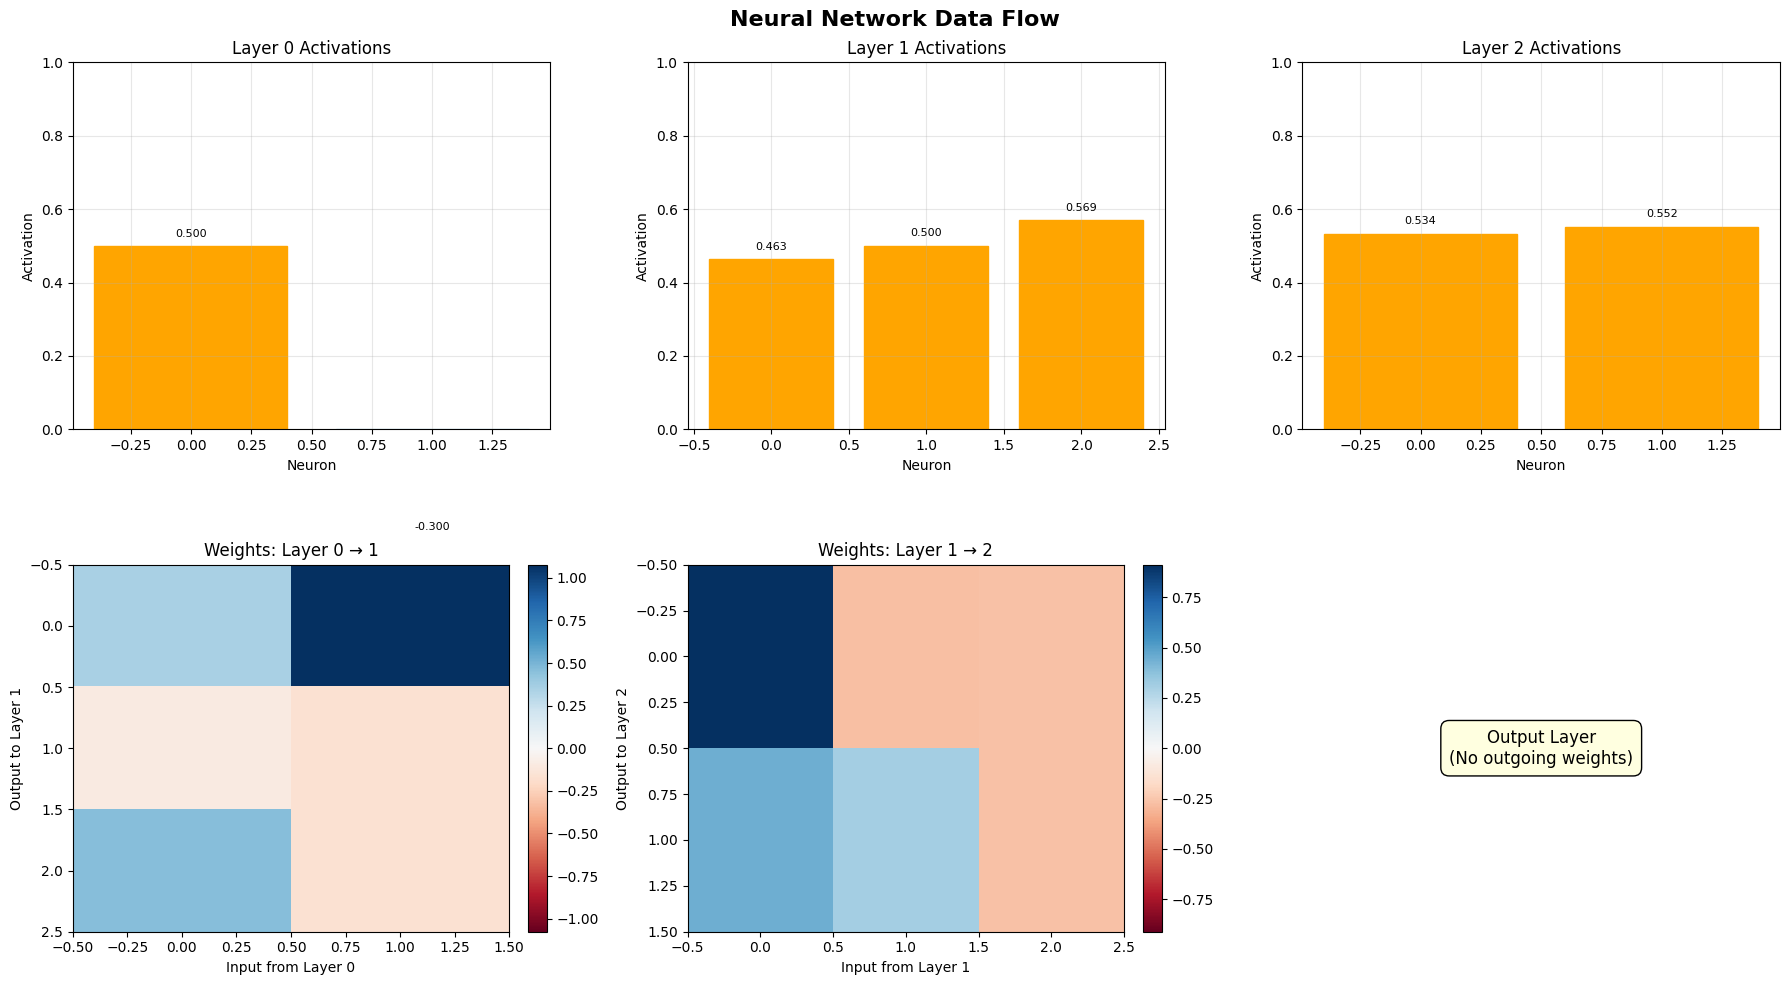


Layer-by-layer Computation Details:

Layer 0 (2 neurons):
  Activations: [ 0.5 -0.3]
  Linear output (z): [-0.14746845  0.00078762  0.27866043]
  After activation: [0.46319956 0.5001969  0.56921778]

Layer 1 (3 neurons):
  Activations: [0.46319956 0.5001969  0.56921778]
  Linear output (z): [0.1344507  0.20886259]
  After activation: [0.53356213 0.55202665]

Layer 2 (2 neurons):
  Activations: [0.53356213 0.55202665]


In [3]:
print("=" * 35)
print("PART 2: DATA FLOW VISUALIZATION")
print("=" * 35)

# Import activation functions from previous labs
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

# Simple neural network implementation for visualization
class VisualizationNetwork:
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.n_layers = len(layer_sizes)
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        for i in range(self.n_layers - 1):
            # Xavier initialization
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) / np.sqrt(layer_sizes[i])
            b = np.zeros(layer_sizes[i+1])
            self.weights.append(w)
            self.biases.append(b)
        
        # Set activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'relu':
            self.activation = relu
        elif activation == 'tanh':
            self.activation = tanh
        
        # Store intermediate values for visualization
        self.activations = []
        self.linear_outputs = []
    
    def forward(self, x):
        """Forward pass with intermediate value storage"""
        self.activations = [x]  # Store input as first activation
        self.linear_outputs = []
        
        current_activation = x
        
        for i in range(self.n_layers - 1):
            # Linear combination
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            self.linear_outputs.append(z)
            
            # Apply activation function (except for output layer in some cases)
            if i < self.n_layers - 2:  # Hidden layers
                current_activation = self.activation(z)
            else:  # Output layer
                current_activation = self.activation(z)  # Or could be linear
            
            self.activations.append(current_activation)
        
        return current_activation

# Create a small network for detailed visualization
network = VisualizationNetwork([2, 3, 2], activation='sigmoid')

# Test input
test_input = np.array([0.5, -0.3])
output = network.forward(test_input)

print(f"Network architecture: {network.layer_sizes}")
print(f"Test input: {test_input}")
print(f"Network output: {output}")

# Visualize the data flow
def visualize_data_flow(network, input_data, title="Neural Network Data Flow"):
    """Visualize how data flows through the network"""
    fig, axes = plt.subplots(2, len(network.layer_sizes), figsize=(18, 10))
    
    # Top row: Activation values
    # Bottom row: Weights and connections
    
    for layer_idx in range(len(network.layer_sizes)):
        # Plot activation values
        ax_top = axes[0, layer_idx]
        ax_bottom = axes[1, layer_idx]
        
        activation = network.activations[layer_idx]
        n_neurons = len(activation)
        
        # Top plot: Bar chart of activation values
        bars = ax_top.bar(range(n_neurons), activation, 
                         color='lightblue', edgecolor='black')
        
        # Color bars based on activation strength
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0.7:
                bar.set_color('red')  # High activation
            elif height > 0.3:
                bar.set_color('orange')  # Medium activation
            else:
                bar.set_color('lightblue')  # Low activation
        
        ax_top.set_ylim(0, 1)
        ax_top.set_title(f'Layer {layer_idx} Activations')
        ax_top.set_xlabel('Neuron')
        ax_top.set_ylabel('Activation')
        ax_top.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(activation):
            ax_top.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=8)
        
        # Bottom plot: Weight visualization (if not last layer)
        if layer_idx < len(network.layer_sizes) - 1:
            weights = network.weights[layer_idx]
            im = ax_bottom.imshow(weights.T, cmap='RdBu', aspect='auto', 
                                vmin=-np.max(np.abs(weights)), vmax=np.max(np.abs(weights)))
            ax_bottom.set_title(f'Weights: Layer {layer_idx} → {layer_idx+1}')
            ax_bottom.set_xlabel(f'Input from Layer {layer_idx}')
            ax_bottom.set_ylabel(f'Output to Layer {layer_idx+1}')
            
            # Add colorbar
            plt.colorbar(im, ax=ax_bottom, fraction=0.046, pad=0.04)
        else:
            ax_bottom.axis('off')
            ax_bottom.text(0.5, 0.5, 'Output Layer\n(No outgoing weights)', 
                         ha='center', va='center', transform=ax_bottom.transAxes,
                         fontsize=12, bbox=dict(boxstyle='round,pad=0.5', 
                                               facecolor='lightyellow'))
    
    fig.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Run the visualization
print("\nDetailed Data Flow Analysis:")
print("-" * 35)
visualize_data_flow(network, test_input)

# Show intermediate computations
print("\nLayer-by-layer Computation Details:")
print("=" * 40)
for i in range(len(network.layer_sizes)):
    print(f"\nLayer {i} ({network.layer_sizes[i]} neurons):")
    print(f"  Activations: {network.activations[i]}")
    
    if i < len(network.linear_outputs):
        print(f"  Linear output (z): {network.linear_outputs[i]}")
        print(f"  After activation: {network.activations[i+1]}")

## Part 3: Decision Boundary Evolution

Let's visualize how decision boundaries change with network depth.

PART 3: DECISION BOUNDARY EVOLUTION
Generated 200 data points
Class distribution: Class 0: 99, Class 1: 101


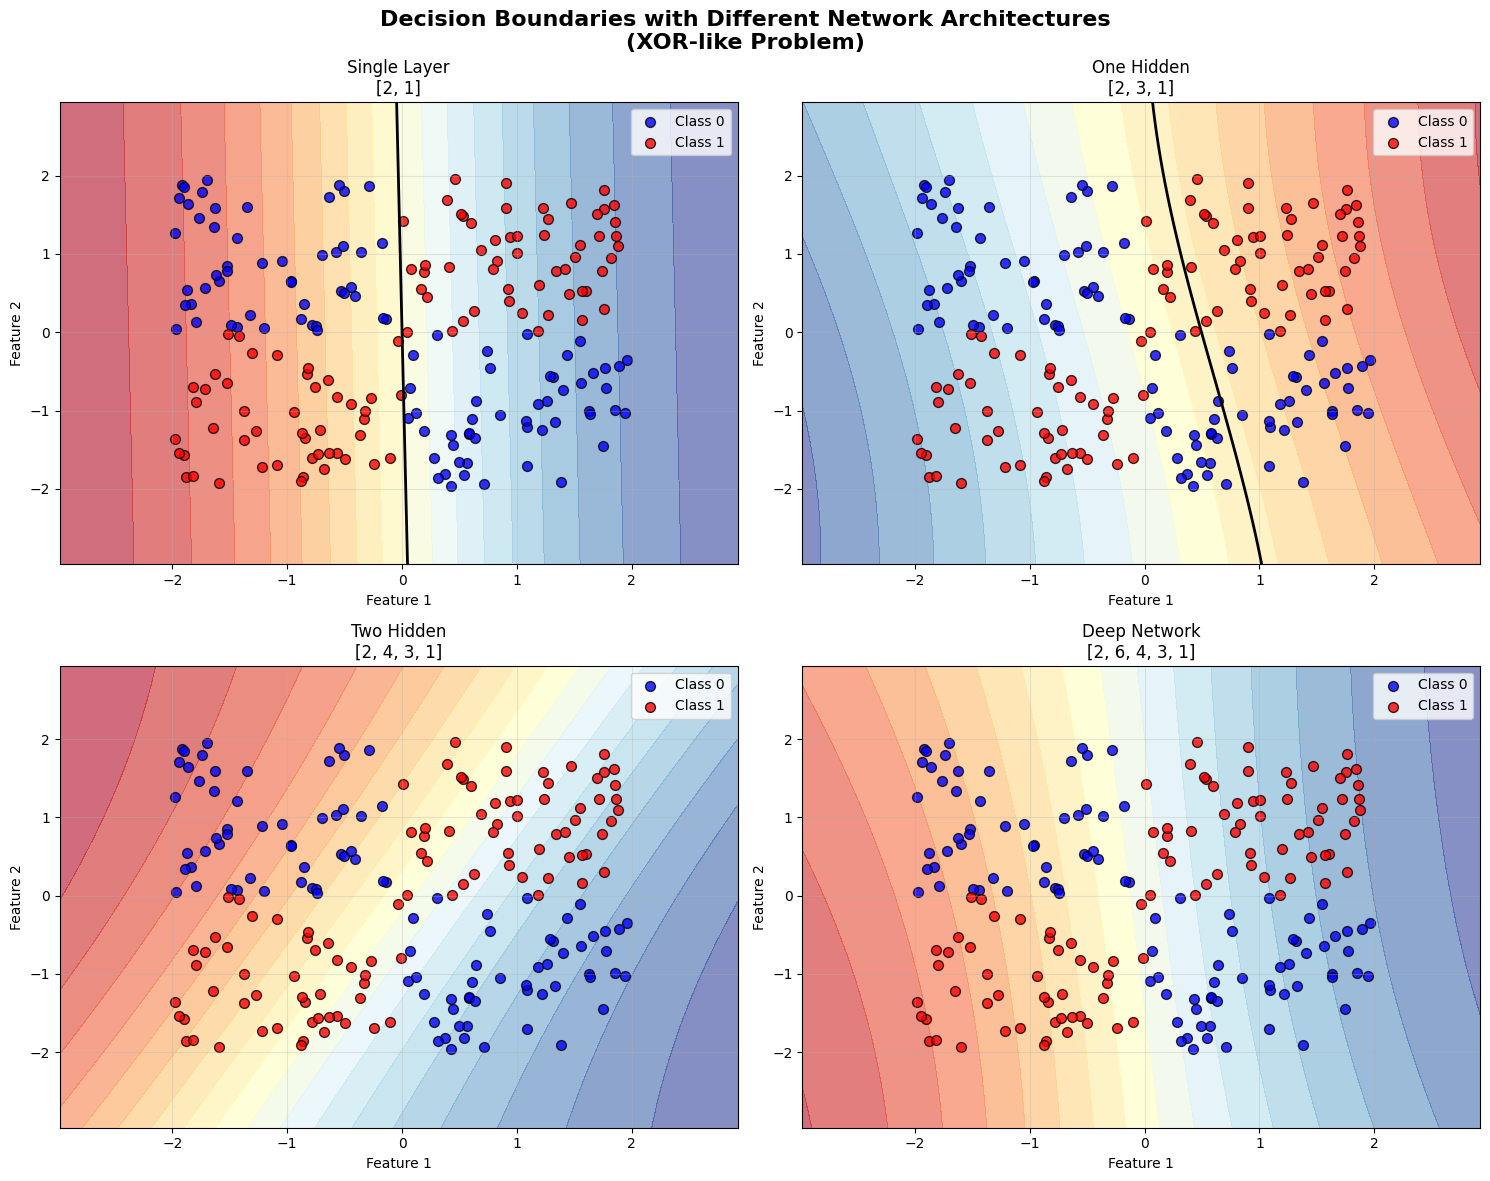


🧠 Key Observations:
   - Single layer: Only linear decision boundaries
   - One hidden layer: Can create non-linear boundaries
   - Deeper networks: More complex, flexible boundaries
   - XOR problem requires at least one hidden layer to solve


In [4]:
print("=" * 40)
print("PART 3: DECISION BOUNDARY EVOLUTION")
print("=" * 40)

# Generate sample 2D classification data
def generate_classification_data(n_samples=200):
    """Generate 2D classification data with interesting patterns"""
    np.random.seed(42)
    
    # Create XOR-like pattern
    X = np.random.uniform(-2, 2, (n_samples, 2))
    
    # XOR pattern: class 1 if x1*x2 > 0, else class 0
    y = ((X[:, 0] * X[:, 1]) > 0).astype(int)
    
    return X, y

# Generate data
X_data, y_data = generate_classification_data()

print(f"Generated {len(X_data)} data points")
print(f"Class distribution: Class 0: {np.sum(y_data == 0)}, Class 1: {np.sum(y_data == 1)}")

# Create networks with different architectures
networks = {
    'Single Layer': VisualizationNetwork([2, 1], 'sigmoid'),
    'One Hidden': VisualizationNetwork([2, 3, 1], 'sigmoid'),
    'Two Hidden': VisualizationNetwork([2, 4, 3, 1], 'sigmoid'),
    'Deep Network': VisualizationNetwork([2, 6, 4, 3, 1], 'sigmoid')
}

def plot_decision_boundary(network, X, y, title, ax):
    """Plot decision boundary for a network"""
    
    # Create a mesh
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = []
    for point in mesh_points:
        output = network.forward(point)
        Z.append(output[0] if hasattr(output, '__len__') else output)
    
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, levels=20, alpha=0.6, cmap='RdYlBu')
    boundary = ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot data points
    colors = ['blue', 'red']
    for class_idx in [0, 1]:
        class_points = X[y == class_idx]
        ax.scatter(class_points[:, 0], class_points[:, 1], 
                  c=colors[class_idx], label=f'Class {class_idx}', 
                  alpha=0.8, edgecolors='black', s=50)
    
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Plot decision boundaries for different network architectures
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (name, network) in enumerate(networks.items()):
    plot_decision_boundary(network, X_data, y_data, 
                          f'{name}\n{network.layer_sizes}', axes[idx])

plt.suptitle('Decision Boundaries with Different Network Architectures\n(XOR-like Problem)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🧠 Key Observations:")
print("   - Single layer: Only linear decision boundaries")
print("   - One hidden layer: Can create non-linear boundaries")
print("   - Deeper networks: More complex, flexible boundaries")
print("   - XOR problem requires at least one hidden layer to solve")

## Part 4: Feature Learning Visualization

Let's visualize how neural networks learn to represent features.

PART 4: FEATURE LEARNING VISUALIZATION

Analyzing network: [2, 4, 3, 1]
Processing sample data through all layers...


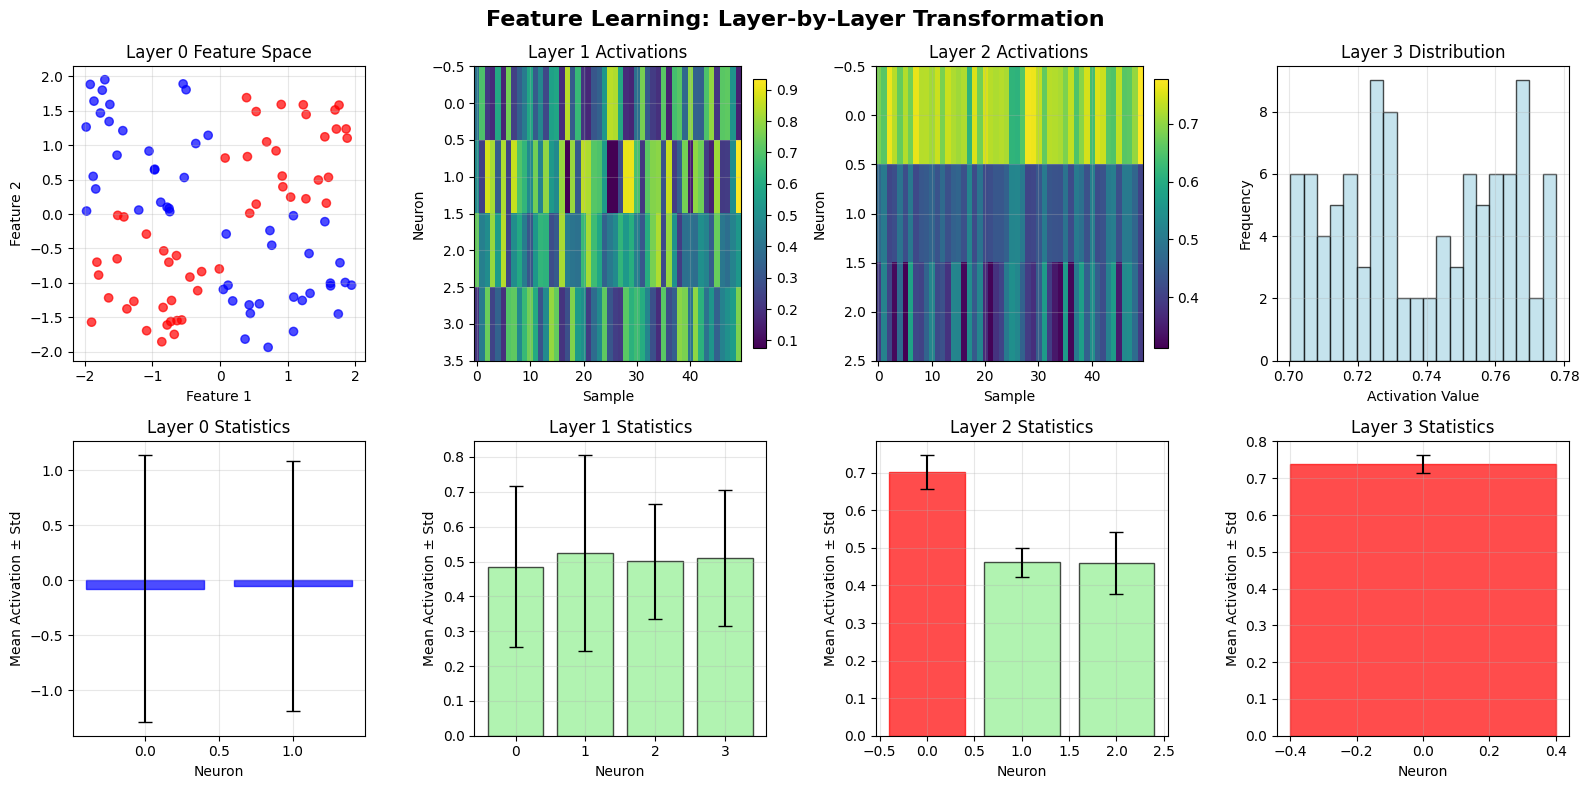

In [5]:
print("=" * 40)
print("PART 4: FEATURE LEARNING VISUALIZATION")
print("=" * 40)

# Create a network that we can analyze layer by layer
def visualize_feature_transformation(network, X_sample, title="Feature Transformation"):
    """Visualize how features are transformed through network layers"""
    
    n_layers = len(network.layer_sizes)
    n_samples = min(len(X_sample), 100)  # Limit samples for clarity
    
    # Process all samples through the network
    layer_outputs = [[] for _ in range(n_layers)]
    
    for sample in X_sample[:n_samples]:
        network.forward(sample)
        for i, activation in enumerate(network.activations):
            layer_outputs[i].append(activation.copy())
    
    # Convert to numpy arrays
    for i in range(n_layers):
        layer_outputs[i] = np.array(layer_outputs[i])
    
    # Create visualization
    fig, axes = plt.subplots(2, n_layers, figsize=(4*n_layers, 8))
    if n_layers == 1:
        axes = axes.reshape(2, 1)
    
    for layer_idx in range(n_layers):
        layer_data = layer_outputs[layer_idx]
        
        # Top plot: Feature space visualization (for 2D/3D)
        ax_top = axes[0, layer_idx]
        
        if layer_data.shape[1] == 1:
            # 1D output - histogram
            ax_top.hist(layer_data[:, 0], bins=20, alpha=0.7, 
                       color='lightblue', edgecolor='black')
            ax_top.set_title(f'Layer {layer_idx} Distribution')
            ax_top.set_xlabel('Activation Value')
            ax_top.set_ylabel('Frequency')
            
        elif layer_data.shape[1] == 2:
            # 2D output - scatter plot
            colors = ['blue' if y_data[i] == 0 else 'red' for i in range(n_samples)]
            ax_top.scatter(layer_data[:, 0], layer_data[:, 1], c=colors, alpha=0.7)
            ax_top.set_title(f'Layer {layer_idx} Feature Space')
            ax_top.set_xlabel('Feature 1')
            ax_top.set_ylabel('Feature 2')
            
        else:
            # Higher dimensional - show heatmap of activations
            im = ax_top.imshow(layer_data[:50].T, aspect='auto', cmap='viridis')
            ax_top.set_title(f'Layer {layer_idx} Activations')
            ax_top.set_xlabel('Sample')
            ax_top.set_ylabel('Neuron')
            plt.colorbar(im, ax=ax_top, fraction=0.046, pad=0.04)
        
        ax_top.grid(True, alpha=0.3)
        
        # Bottom plot: Activation statistics
        ax_bottom = axes[1, layer_idx]
        
        # Show mean activation per neuron
        mean_activations = np.mean(layer_data, axis=0)
        std_activations = np.std(layer_data, axis=0)
        
        bars = ax_bottom.bar(range(len(mean_activations)), mean_activations, 
                           yerr=std_activations, capsize=5,
                           color='lightgreen', edgecolor='black', alpha=0.7)
        
        ax_bottom.set_title(f'Layer {layer_idx} Statistics')
        ax_bottom.set_xlabel('Neuron')
        ax_bottom.set_ylabel('Mean Activation ± Std')
        ax_bottom.grid(True, alpha=0.3)
        
        # Highlight neurons with high/low activity
        for i, bar in enumerate(bars):
            if mean_activations[i] > 0.7:
                bar.set_color('red')  # High activity
            elif mean_activations[i] < 0.3:
                bar.set_color('blue')  # Low activity
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analyze a 3-layer network in detail
feature_network = VisualizationNetwork([2, 4, 3, 1], 'sigmoid')
print(f"\nAnalyzing network: {feature_network.layer_sizes}")
print("Processing sample data through all layers...")

visualize_feature_transformation(feature_network, X_data, 
                               "Feature Learning: Layer-by-Layer Transformation")

## Part 5: Weight and Bias Visualization

Let's examine how weights and biases determine network behavior.

PART 5: WEIGHTS AND BIAS ANALYSIS

Network Parameter Analysis:
-----------------------------------


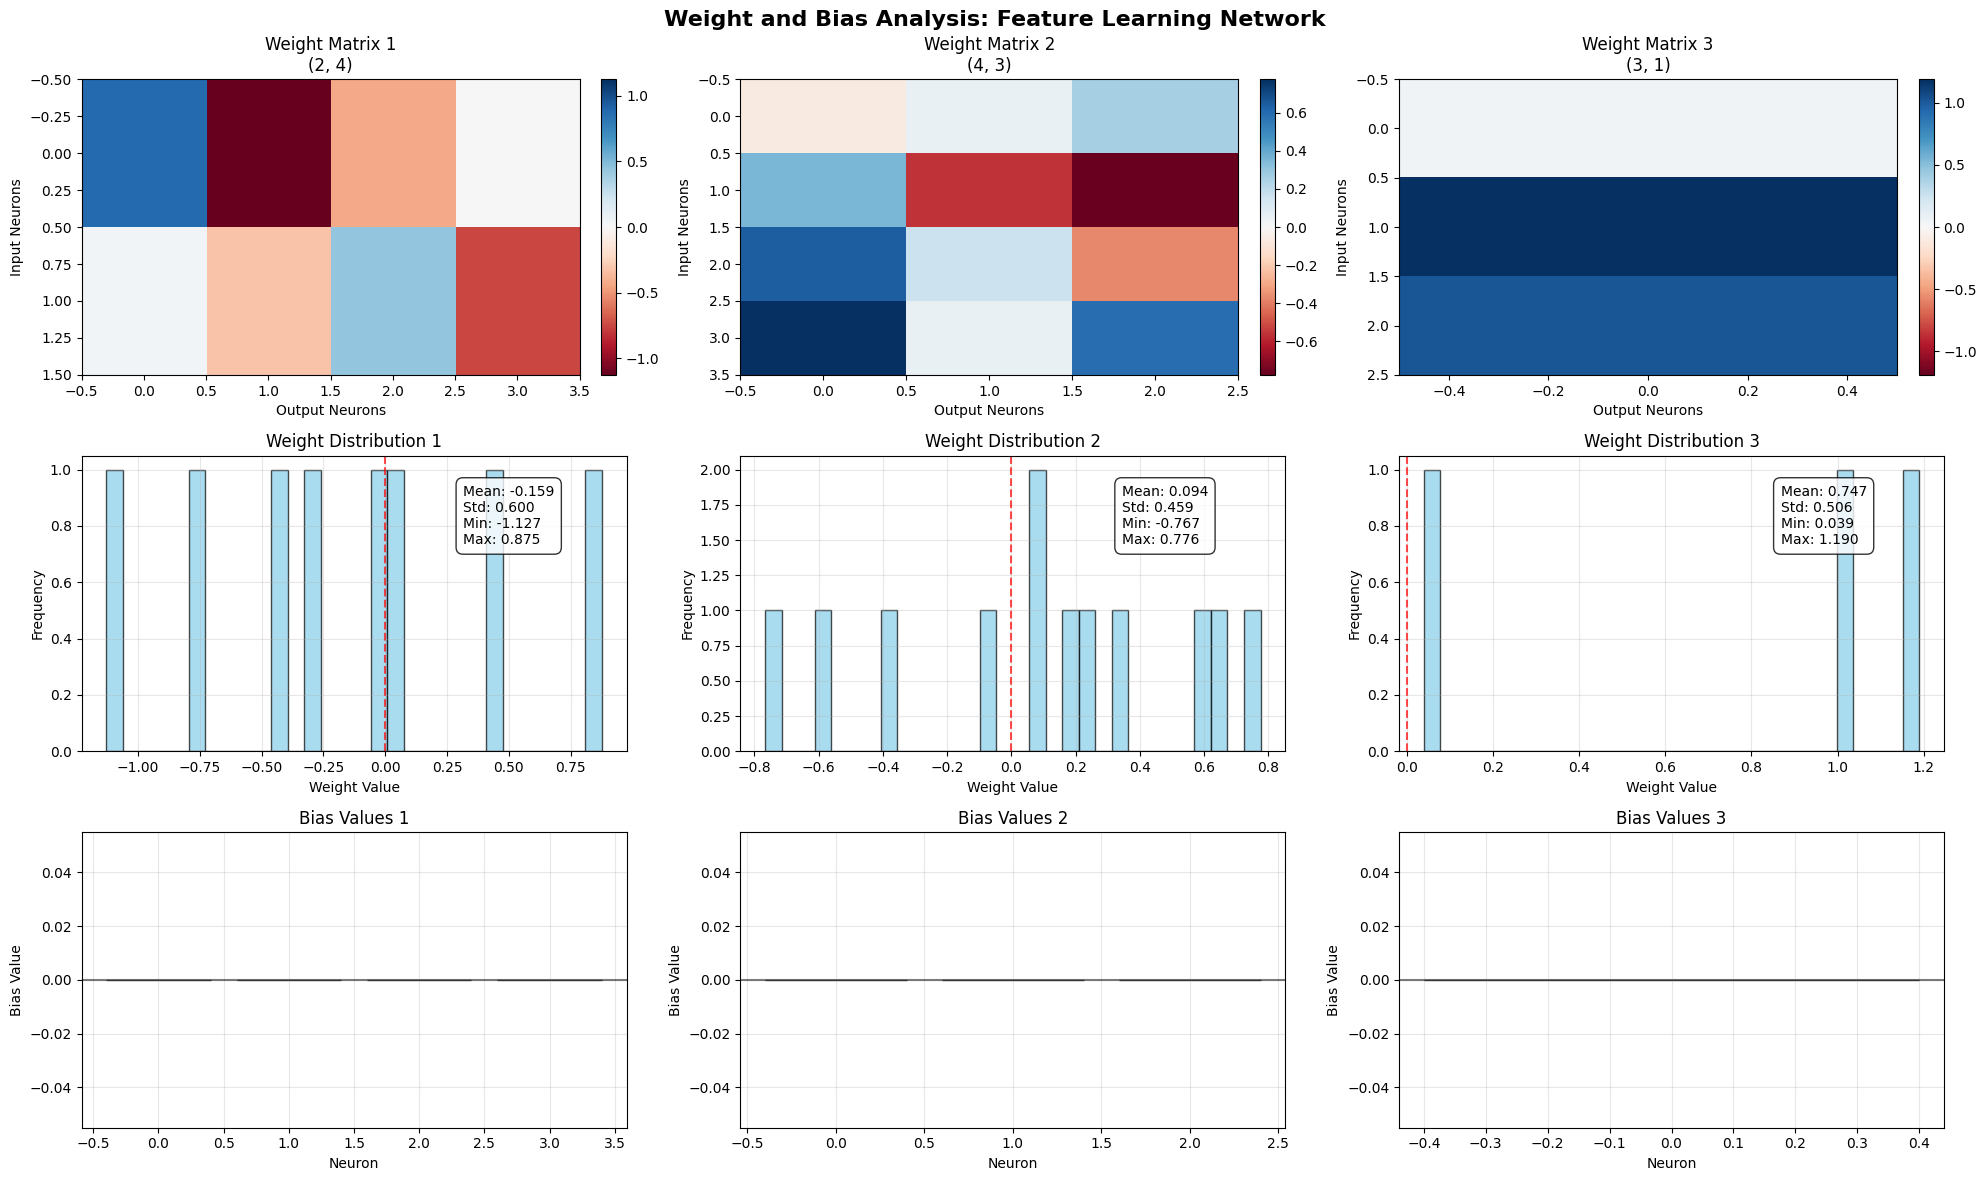


Detailed Parameter Summary:

Layer 1 -> Layer 2:
  Weight matrix: (2, 4)
  Bias vector: (4,)
  Parameters: 12
  Weight range: [-1.127, 0.875]
  Bias range: [0.000, 0.000]

Layer 2 -> Layer 3:
  Weight matrix: (4, 3)
  Bias vector: (3,)
  Parameters: 15
  Weight range: [-0.767, 0.776]
  Bias range: [0.000, 0.000]

Layer 3 -> Layer 4:
  Weight matrix: (3, 1)
  Bias vector: (1,)
  Parameters: 4
  Weight range: [0.039, 1.190]
  Bias range: [0.000, 0.000]

Total network parameters: 31
Memory usage (approx): 0.24 KB


In [6]:
print("=" * 35)
print("PART 5: WEIGHTS AND BIAS ANALYSIS")
print("=" * 35)

def visualize_weights_and_biases(network, title="Network Parameters"):
    """Comprehensive visualization of network weights and biases"""
    
    n_layers = len(network.weights)
    
    # Create subplots
    fig = plt.figure(figsize=(20, 12))
    
    # Weight matrices
    for i, weights in enumerate(network.weights):
        # Weight heatmap
        ax1 = plt.subplot(3, n_layers, i + 1)
        im1 = ax1.imshow(weights, cmap='RdBu', aspect='auto',
                        vmin=-np.max(np.abs(weights)), vmax=np.max(np.abs(weights)))
        ax1.set_title(f'Weight Matrix {i+1}\n{weights.shape}')
        ax1.set_xlabel('Output Neurons')
        ax1.set_ylabel('Input Neurons')
        plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
        
        # Weight distribution
        ax2 = plt.subplot(3, n_layers, n_layers + i + 1)
        ax2.hist(weights.flatten(), bins=30, alpha=0.7, 
                color='skyblue', edgecolor='black')
        ax2.set_title(f'Weight Distribution {i+1}')
        ax2.set_xlabel('Weight Value')
        ax2.set_ylabel('Frequency')
        ax2.axvline(0, color='red', linestyle='--', alpha=0.7)
        ax2.grid(True, alpha=0.3)
        
        # Statistics text
        mean_w = np.mean(weights)
        std_w = np.std(weights)
        min_w = np.min(weights)
        max_w = np.max(weights)
        
        stats_text = f'Mean: {mean_w:.3f}\nStd: {std_w:.3f}\nMin: {min_w:.3f}\nMax: {max_w:.3f}'
        ax2.text(0.7, 0.7, stats_text, transform=ax2.transAxes,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
        
        # Bias visualization
        ax3 = plt.subplot(3, n_layers, 2*n_layers + i + 1)
        biases = network.biases[i]
        bars = ax3.bar(range(len(biases)), biases, 
                      color='lightcoral', edgecolor='black', alpha=0.7)
        ax3.set_title(f'Bias Values {i+1}')
        ax3.set_xlabel('Neuron')
        ax3.set_ylabel('Bias Value')
        ax3.axhline(0, color='black', linestyle='-', alpha=0.5)
        ax3.grid(True, alpha=0.3)
        
        # Color bars based on bias magnitude
        for j, bar in enumerate(bars):
            if abs(biases[j]) > 0.5:
                bar.set_color('red' if biases[j] > 0 else 'blue')
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analyze our network's parameters
print("\nNetwork Parameter Analysis:")
print("-" * 35)
visualize_weights_and_biases(feature_network, 
                           "Weight and Bias Analysis: Feature Learning Network")

# Show detailed parameter information
print("\nDetailed Parameter Summary:")
print("=" * 40)
total_params = 0

for i, (weights, biases) in enumerate(zip(feature_network.weights, feature_network.biases)):
    layer_params = weights.size + biases.size
    total_params += layer_params
    
    print(f"\nLayer {i+1} -> Layer {i+2}:")
    print(f"  Weight matrix: {weights.shape}")
    print(f"  Bias vector: {biases.shape}")
    print(f"  Parameters: {layer_params}")
    print(f"  Weight range: [{np.min(weights):.3f}, {np.max(weights):.3f}]")
    print(f"  Bias range: [{np.min(biases):.3f}, {np.max(biases):.3f}]")

print(f"\nTotal network parameters: {total_params}")
print(f"Memory usage (approx): {total_params * 8 / 1024:.2f} KB")

## Part 6: Interactive Network Explorer

Let's create an interactive tool to explore how network parameters affect behavior.

In [ ]:
print("=" * 40)
print("PART 6: INTERACTIVE NETWORK EXPLORATION")
print("=" * 40)

# Simple interactive network exploration
def explore_network_behavior(network_configs, test_points):
    """Explore different network configurations"""
    
    fig, axes = plt.subplots(2, len(network_configs), figsize=(5*len(network_configs), 10))
    if len(network_configs) == 1:
        axes = axes.reshape(2, 1)
    
    for idx, (name, network) in enumerate(network_configs.items()):
        ax_top = axes[0, idx]
        ax_bottom = axes[1, idx]
        
        # Test the network with different inputs
        outputs = []
        for point in test_points:
            output = network.forward(point)
            outputs.append(output[0] if hasattr(output, '__len__') else output)
        
        # Top plot: Input-output mapping
        if test_points.shape[1] == 2:
            # 2D input case
            scatter = ax_top.scatter(test_points[:, 0], test_points[:, 1], 
                                   c=outputs, cmap='viridis', s=50, alpha=0.7)
            ax_top.set_xlabel('Input 1')
            ax_top.set_ylabel('Input 2')
            plt.colorbar(scatter, ax=ax_top, fraction=0.046, pad=0.04, label='Output')
        else:
            # 1D input case
            ax_top.plot(test_points[:, 0], outputs, 'bo-', linewidth=2, markersize=4)
            ax_top.set_xlabel('Input')
            ax_top.set_ylabel('Output')
        
        ax_top.set_title(f'{name}\nInput-Output Mapping')
        ax_top.grid(True, alpha=0.3)
        
        # Bottom plot: Network response surface (for 2D input)
        if test_points.shape[1] == 2:
            # Create a finer grid
            x_range = np.linspace(test_points[:, 0].min(), test_points[:, 0].max(), 50)
            y_range = np.linspace(test_points[:, 1].min(), test_points[:, 1].max(), 50)
            X, Y = np.meshgrid(x_range, y_range)
            Z = np.zeros_like(X)
            
            for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    point = np.array([X[i, j], Y[i, j]])
                    output = network.forward(point)
                    Z[i, j] = output[0] if hasattr(output, '__len__') else output
            
            contour = ax_bottom.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
            ax_bottom.contour(X, Y, Z, levels=10, colors='black', alpha=0.3, linewidths=0.5)
            ax_bottom.set_xlabel('Input 1')
            ax_bottom.set_ylabel('Input 2')
            plt.colorbar(contour, ax=ax_bottom, fraction=0.046, pad=0.04, label='Output')
        else:
            # For 1D, show derivative approximation
            x_fine = np.linspace(test_points[:, 0].min(), test_points[:, 0].max(), 100)
            y_fine = []
            for x in x_fine:
                output = network.forward(np.array([x]))
                y_fine.append(output[0] if hasattr(output, '__len__') else output)
            
            ax_bottom.plot(x_fine, y_fine, 'r-', linewidth=2, label='Network Response')
            ax_bottom.set_xlabel('Input')
            ax_bottom.set_ylabel('Output')
            ax_bottom.legend()
        
        ax_bottom.set_title(f'{name}\nResponse Surface')
        ax_bottom.grid(True, alpha=0.3)
    
    plt.suptitle('Network Behavior Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Create test configurations
test_networks = {
    'Linear (No Hidden)': VisualizationNetwork([2, 1], 'sigmoid'),
    'Small Hidden': VisualizationNetwork([2, 3, 1], 'sigmoid'),
    'Large Hidden': VisualizationNetwork([2, 8, 1], 'sigmoid'),
}

# Generate test points
test_grid = np.array([[x, y] for x in np.linspace(-2, 2, 10) 
                                for y in np.linspace(-2, 2, 10)])

print("\nComparing Network Architectures:")
print("-" * 40)
explore_network_behavior(test_networks, test_grid)

# Show complexity comparison
print("\nComplexity Comparison:")
print("=" * 30)
for name, network in test_networks.items():
    total_params = sum(w.size + b.size for w, b in zip(network.weights, network.biases))
    print(f"{name:<20}: {network.layer_sizes} -> {total_params} parameters")

print("\n🔍 Observations:")
print("   - More parameters allow more complex decision boundaries")
print("   - But also increase risk of overfitting")
print("   - Architecture choice is crucial for performance")

## Part 7: Learning Process Visualization

Let's simulate and visualize how a network might learn over time.

In [ ]:
print("=" * 40)
print("PART 7: SIMULATED LEARNING VISUALIZATION")
print("=" * 40)

def simulate_learning_process(initial_network, target_function, n_steps=10):
    """Simulate how network parameters might change during learning"""
    
    # Generate training data
    X_train = np.random.uniform(-2, 2, (100, 2))
    y_train = target_function(X_train)
    
    # Create snapshots of the network at different "training stages"
    networks = []
    
    for step in range(n_steps):
        # Create a copy of the network
        network_copy = VisualizationNetwork(initial_network.layer_sizes, 'sigmoid')
        
        # Simulate weight evolution (simplified)
        progress = step / (n_steps - 1)  # 0 to 1
        
        for i in range(len(network_copy.weights)):
            # Start with random weights, gradually "improve" them
            # This is a simplified simulation, not actual training
            noise_scale = 1.0 - 0.8 * progress  # Reduce randomness over time
            network_copy.weights[i] = initial_network.weights[i] * (1 + noise_scale * np.random.randn(*initial_network.weights[i].shape) * 0.1)
            network_copy.biases[i] = initial_network.biases[i] * (1 + noise_scale * np.random.randn(*initial_network.biases[i].shape) * 0.1)
        
        networks.append((f"Step {step+1}", network_copy))
    
    return networks, X_train, y_train

# Define a target function (XOR-like)
def xor_target(X):
    return ((X[:, 0] * X[:, 1]) > 0).astype(float)

# Create initial network
learning_network = VisualizationNetwork([2, 4, 1], 'sigmoid')

# Simulate learning process
print("\nSimulating learning process...")
learning_snapshots, X_train, y_train = simulate_learning_process(
    learning_network, xor_target, n_steps=6)

# Visualize learning progression
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (step_name, network) in enumerate(learning_snapshots):
    ax = axes[idx]
    
    # Create decision boundary
    h = 0.1
    x_min, x_max = -2.5, 2.5
    y_min, y_max = -2.5, 2.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = []
    for point in mesh_points:
        output = network.forward(point)
        Z.append(output[0] if hasattr(output, '__len__') else output)
    
    Z = np.array(Z).reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, levels=20, alpha=0.6, cmap='RdYlBu')
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot training data
    colors = ['blue', 'red']
    for class_val in [0, 1]:
        class_points = X_train[y_train == class_val]
        ax.scatter(class_points[:, 0], class_points[:, 1], 
                  c=colors[int(class_val)], label=f'Class {int(class_val)}',
                  alpha=0.8, edgecolors='black', s=30)
    
    # Calculate accuracy
    predictions = []
    for point in X_train:
        output = network.forward(point)
        pred = 1 if (output[0] if hasattr(output, '__len__') else output) > 0.5 else 0
        predictions.append(pred)
    
    accuracy = np.mean(np.array(predictions) == y_train)
    
    ax.set_title(f'{step_name}\nAccuracy: {accuracy:.3f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    
    if idx == 0:
        ax.legend()

plt.suptitle('Simulated Learning Process: Decision Boundary Evolution', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📚 Learning Process Insights:")
print("   - Initially: Random decision boundaries")
print("   - Gradually: Boundaries adapt to data patterns")
print("   - Eventually: Complex patterns can be learned")
print("   - This simulation shows the power of iterative learning!")

# Show weight evolution
print("\nWeight Evolution Analysis:")
print("-" * 35)
first_network = learning_snapshots[0][1]
last_network = learning_snapshots[-1][1]

for layer_idx in range(len(first_network.weights)):
    initial_weights = first_network.weights[layer_idx]
    final_weights = last_network.weights[layer_idx]
    
    weight_change = np.mean(np.abs(final_weights - initial_weights))
    print(f"Layer {layer_idx+1}: Average weight change = {weight_change:.4f}")

## Progress Checklist

Mark each concept as understood:

- [ ] Neural network architecture diagrams
- [ ] Data flow visualization through network layers
- [ ] Decision boundary evolution with network depth
- [ ] Feature transformation visualization
- [ ] Weight and bias analysis techniques
- [ ] Interactive network exploration methods
- [ ] Learning process simulation and visualization
- [ ] Understanding of network complexity tradeoffs
- [ ] Visual intuition for deep learning concepts
- [ ] Tools for analyzing network behavior

## Troubleshooting

### Common Issues:

**1. Visualization rendering problems:**
- Ensure matplotlib backend supports interactive plots
- Try `%matplotlib inline` or `%matplotlib notebook`
- Restart Jupyter kernel if plots don't appear

**2. Memory issues with large visualizations:**
- Reduce grid resolution for decision boundary plots
- Limit number of test points for analysis
- Use smaller networks for detailed analysis

**3. Slow visualization performance:**
- Optimize network forward pass implementation
- Use vectorized operations where possible
- Consider sampling data for large datasets

**4. Colormap interpretation:**
- Check colorbar scales and ranges
- Use consistent color schemes across plots
- Consider colorblind-friendly palettes

**5. Plot layout issues:**
- Adjust figure sizes for better visibility
- Use `plt.tight_layout()` to prevent overlap
- Consider subplot arrangements for complex visualizations

## Key Concepts Summary

1. **Architecture Visualization**: Clear diagrams help understand network structure
2. **Data Flow**: Tracking how information transforms through layers
3. **Decision Boundaries**: Visual representation of network decision-making
4. **Feature Learning**: How networks create useful representations
5. **Parameter Analysis**: Understanding weights and biases through visualization
6. **Network Comparison**: Visual tools for comparing different architectures
7. **Learning Dynamics**: Visualization of how networks change during training
8. **Interactive Exploration**: Tools for hands-on understanding

## Applications in Practice

These visualization techniques are used in real-world deep learning for:
- **Model debugging**: Identifying problems in network behavior
- **Architecture design**: Choosing appropriate network structures
- **Training monitoring**: Tracking learning progress
- **Feature analysis**: Understanding what networks learn
- **Hyperparameter tuning**: Visual feedback for optimization
- **Model interpretation**: Making black-box models more transparent

## Next Steps

In the next lab, we'll apply these visualization techniques to analyze real-world problems and understand how different network architectures perform on practical tasks.

---

**Congratulations! You've mastered neural network visualization techniques that will help you understand and debug deep learning models!**